In [78]:
#Requires
#pip install -U sentence-transformers
#pip install transformers
from transformers import pipeline, AutoTokenizer
import json
import string

import numpy as np
import scipy
from sentence_transformers import SentenceTransformer

vectorizer = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

def removeNonAscii(paragraph):
    printable = set(string.printable)
    return "".join([c if c in printable else ' ' for c in paragraph])

def loadJsonDataForBART(maxArticles=None):
    """Loads the JSON data into three lists. Cuts articles at 5000 characters since the model does not handle data longer than this.
    Adds \n between paragraphs
    Only loads maxArticles number of articles, for debugging (if None it loads all)
    @return lists: titles, texts, labels
    """
    texts = []
    titles = []
    labels = []
    dictLabels = {}

    with open('../data/truth.jsonl') as file:
        for line in file.readlines():
            d = json.loads(line)
            dictLabels[d['id']] = d['truthMean']
    index=0
    with open('../data/instances.jsonl') as file:
        for line in file.readlines():
            d = json.loads(line)
            texts.append("\n ".join([removeNonAscii(p) for p in d['targetParagraphs']]))

            titles.append(removeNonAscii(d['targetTitle']))
            labels.append(dictLabels[d['id']])
            
            index+=1
            if(maxArticles != None and index >= maxArticles):
                break
    
    return titles,texts,labels  

titles,texts,labels = loadJsonDataForBART()

#tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
summarizer = pipeline('summarization')
#print(titles[0])

sim = scipy.spatial.distance.cosine
#n = 1

#print(titles[n], "\nClickbait average: ", labels[n])

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
lr = LinearRegression()

In [33]:
for n in range(len(texts)):
    u = vectorizer.encode(titles[n])
    x = summarizer(texts[n][:4000])
    x = x[0]['summary_text']
    v = vectorizer.encode(x)
    print(1-sim(u,v), labels[n], (1-sim(u,v) - labels[n])**2)

0.6113559007644653 0.13333333332 0.22850557498619845
0.5560923218727112 1.0 0.19705402670036065
0.7398489713668823 0.46666666664 0.07462857161589119
0.755362868309021 0.93333333332 0.031673486416224104
0.6058721542358398 0.0 0.3670810672783773
0.5574305653572083 0.06666666666 0.2408492042644837
0.6037328839302063 0.33333333332 0.07311591697020153
0.4377001225948334 0.06666666666 0.13766582542294595
0.09959526360034943 0.3333333333 0.0546334852269187
0.6146566271781921 0.13333333332 0.2316721132104996
0.5814914107322693 0.73333333332 0.02305596945513839
0.48165422677993774 0.59999999996 0.014005722029586738
0.7207603454589844 0.26666666666 0.2062010691251952
0.5327020883560181 0.0 0.2837715149388629
0.5205274224281311 0.06666666666 0.20598958562641917


In [81]:
def getSplit():
    X = []
    for n in range(len(texts)):
        try:
            u = vectorizer.encode(titles[n])
            x = summarizer(texts[n][:4000])
            x = x[0]['summary_text']
            v = vectorizer.encode(x)
            X.append(np.concatenate([u,v]))
        except:
            u = vectorizer.encode(titles[n])
            x = summarizer(texts[n][:500])
            x = x[0]['summary_text']
            v = vectorizer.encode(x)
            X.append(np.concatenate([u,v]))
        
        
    return train_test_split(X, labels, test_size=0.2, random_state=10)

In [82]:
XTrain, XTest, yTrain, yTest = getSplit()

Your max_length is set to 142, but you input_length is only 61. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 59. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 85. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 114. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 87. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 126. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 104. You might consi

Your max_length is set to 142, but you input_length is only 108. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 140. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 39. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 67. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 109. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 97. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 67. You might consi

Your max_length is set to 142, but you input_length is only 92. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 109. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your min_length is set to 56, but you input_length is only 9. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 9. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 56. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 81. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 31. You might consider d

Your max_length is set to 142, but you input_length is only 101. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 97. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 50. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 29. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 138. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 44. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 62. You might consid

Your min_length is set to 56, but you input_length is only 9. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 9. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 55. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 85. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 132. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 104. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 73. You might consider 

Your max_length is set to 142, but you input_length is only 107. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 29. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 113. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 124. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 39. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your min_length is set to 56, but you input_length is only 6. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 6. You might consider

Your max_length is set to 142, but you input_length is only 72. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 138. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 92. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 74. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 72. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 65. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 130. You might consid

Your max_length is set to 142, but you input_length is only 113. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 98. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 55. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 125. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 29. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 72. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 34. You might consid

Your max_length is set to 142, but you input_length is only 120. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 129. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 126. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 92. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 63. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 83. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 95. You might consi

Your max_length is set to 142, but you input_length is only 122. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 121. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 65. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 72. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 101. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 32. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 103. You might cons

Your max_length is set to 142, but you input_length is only 85. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 135. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 57. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 96. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 87. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 95. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 71. You might conside

Your max_length is set to 142, but you input_length is only 134. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 120. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 101. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 133. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 51. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 98. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 64. You might cons

Your max_length is set to 142, but you input_length is only 97. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 105. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 119. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 52. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 39. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 78. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 97. You might consid

Your max_length is set to 142, but you input_length is only 99. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 69. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 70. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 85. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 82. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 56. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 106. You might conside

Your max_length is set to 142, but you input_length is only 129. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 37. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 102. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 87. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 88. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 28. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 118. You might consi

Your max_length is set to 142, but you input_length is only 106. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 33. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 47. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 109. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 132. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 99. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 64. You might consi

Your max_length is set to 142, but you input_length is only 33. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your min_length is set to 56, but you input_length is only 20. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 20. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 54. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 52. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your min_length is set to 56, but you input_length is only 16. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 16. You might consider d

Your max_length is set to 142, but you input_length is only 70. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 69. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 103. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 77. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your min_length is set to 56, but you input_length is only 17. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 17. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 120. You might conside

Your max_length is set to 142, but you input_length is only 61. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 124. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 95. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your min_length is set to 56, but you input_length is only 14. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 14. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 90. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 64. You might consider

Your max_length is set to 142, but you input_length is only 85. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 73. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 87. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 117. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 127. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 38. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 54. You might consid

Your max_length is set to 142, but you input_length is only 104. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 46. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 102. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 29. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 77. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 92. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your min_length is set to 56, but you input_length is only 21. You might conside

Your max_length is set to 142, but you input_length is only 9. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your min_length is set to 56, but you input_length is only 9. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 9. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 48. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 129. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your min_length is set to 56, but you input_length is only 26. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 26. You might consider dec

Your max_length is set to 142, but you input_length is only 132. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 70. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your min_length is set to 56, but you input_length is only 27. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 27. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 69. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 92. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 113. You might conside

Your max_length is set to 142, but you input_length is only 96. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 61. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 93. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 97. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 35. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 75. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 89. You might consider

Your max_length is set to 142, but you input_length is only 52. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 102. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 141. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 101. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 75. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 135. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 117. You might con

Your max_length is set to 142, but you input_length is only 55. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 85. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 86. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 104. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 69. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 111. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 95. You might consid

Your max_length is set to 142, but you input_length is only 88. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 112. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 132. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 102. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 39. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 98. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 42. You might consi

Your max_length is set to 142, but you input_length is only 94. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 99. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 34. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 32. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 41. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 85. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 91. You might consider

Your max_length is set to 142, but you input_length is only 69. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 139. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 122. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 74. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 116. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 126. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 51. You might cons

Your min_length is set to 56, but you input_length is only 14. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 14. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 127. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 94. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 63. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 105. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 92. You might conside

Your max_length is set to 142, but you input_length is only 117. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 76. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 83. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 79. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 88. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your min_length is set to 56, but you input_length is only 22. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 22. You might consider

Your max_length is set to 142, but you input_length is only 18. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 104. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 35. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 82. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your min_length is set to 56, but you input_length is only 9. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 9. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 53. You might consider d

Your max_length is set to 142, but you input_length is only 78. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your min_length is set to 56, but you input_length is only 26. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 26. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 89. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 61. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 92. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 85. You might consider 

Your max_length is set to 142, but you input_length is only 86. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 98. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 134. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 33. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 76. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 70. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 29. You might conside

Your max_length is set to 142, but you input_length is only 126. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 72. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 88. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 96. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 113. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 97. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 28. You might consid

Your min_length is set to 56, but you input_length is only 22. You might consider decreasing min_length manually, e.g. summarizer('...', min_length=10)
Your max_length is set to 142, but you input_length is only 22. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 88. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 123. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 107. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 116. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 90. You might consid

Your max_length is set to 142, but you input_length is only 94. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 88. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 84. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 101. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 70. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 71. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your min_length is set to 56, but you input_length is only 9. You might consider 

Your max_length is set to 142, but you input_length is only 51. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 55. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 40. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 42. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 69. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 100. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)
Your max_length is set to 142, but you input_length is only 113. You might consid

In [167]:
from sklearn.dummy import DummyClassifier
baseline = DummyClassifier(strategy = 'most_frequent')
baseline.fit(XTrain,yTrainClass)
bPred = baseline.predict(XTest)
print("Baseline Acc: ", metrics.accuracy_score(yTestClass, bPred))
print(metrics.f1_score(yTestClass,bPred, average='macro'))
print(metrics.f1_score(yTestClass,bPred, average='micro'))
print(metrics.precision_score(yTestClass,bPred,average='macro'))
print(metrics.precision_score(yTestClass,bPred,average='micro'))

Baseline Acc:  0.4293756397134084
0.1501969208736126
0.4293756397134084
0.1073439099283521
0.4293756397134084


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
import pickle
pickle.dump(XTest,open("XTest.pkl", "wb"))
pickle.dump(yTest,open("yTest.pkl", "wb"))
pickle.dump(XTrain,open("XTrain.pkl", "wb"))
pickle.dump(yTrain,open("yTrain.pkl", "wb"))

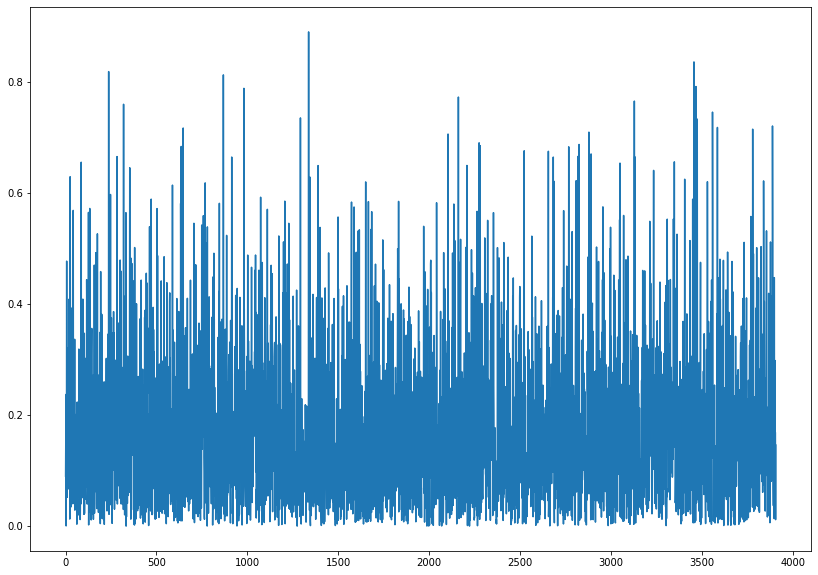

In [87]:
plt.figure(figsize=(14,10))
sns.lineplot(x=range(len(pred)), y=np.abs(pred-yTest))
plt.show()

In [106]:
def roundLabel(value):
    """
    Rounds the value to the nearest label and assigns an integer as the new label.
    <0.33/2 -> 0
    <0.33 + 0.33/2 -> 1
    <0.66 + 0.33/2 -> 2
    _ -> 3
    @return the new label
    """
    tmp = 0.33/2
    
    if(value < tmp):
        return 0
    if(value < 0.33 + tmp):
        return 1
    if(value < 0.66 + tmp):
        return 2
    return 3

In [109]:
len(XTrain)

15630

In [107]:
yTrainClass = [roundLabel(v) for v in yTrain]
yTestClass = [roundLabel(v) for v in yTest]

In [125]:
from sklearn.metrics import accuracy_score
from sklearn import svm
svcRes = []

for kernel in ['linear','poly','rbf']:
    for C in [5e-2,5e-1,1,5,50]:
        svc = svm.SVC(kernel=kernel,C=C)
        svc.fit(XTrain[:5000],yTrainClass[:5000])
        svcRes.append(accuracy_score(yTestClass,svc.predict(XTest)))

In [126]:
info = {}
info["kernel"] = ["linear","linear","linear","linear","linear","poly","poly","poly","poly","poly","rbf","rbf","rbf","rbf","rbf"]
info["C"] = [5e-2,5e-1,1,5,50,5e-2,5e-1,1,5,50,5e-2,5e-1,1,5,50]
info["acc"] = svcRes

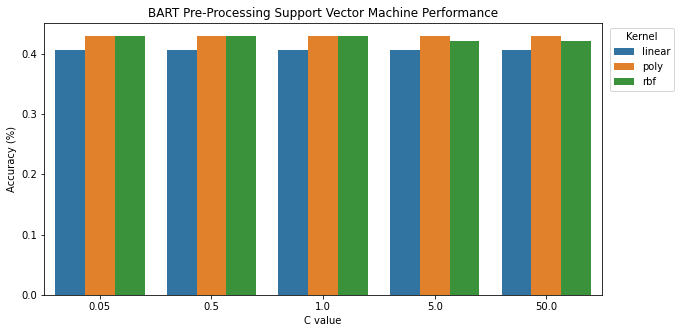

In [163]:
plt.figure(figsize=(10,5))
plt.title("BART Pre-Processing Support Vector Machine Performance")
sns.barplot(x="C",y="acc", hue="kernel",data=info)
plt.xlabel("C value")
plt.ylabel("Accuracy (%)")
plt.legend(title="Kernel", bbox_to_anchor=(1.005, 1))
plt.savefig("svcPerformance")
plt.show()

In [ ]:
#Acc SVM: 0.41760491299897645
#[0 1 1 ... 0 0 1]
#Acc SVM: 0.4907881269191402

In [164]:
import numpy as np
import pandas as pd
import nltk
import string
from sklearn import metrics

train_data = XTrain
train_labels = yTrainClass

test_data = XTest
test_labels = yTestClass

#-------------------------
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state = 0, solver = 'lbfgs',max_iter=1000).fit(train_data, train_labels)
clf1_pred = clf1.predict(test_data)
acc_score1 = metrics.accuracy_score(test_labels, clf1_pred)
print('Acc LR: {}'.format(acc_score1))
print(metrics.f1_score(test_labels,clf1_pred,average='macro'))
print(metrics.f1_score(test_labels,clf1_pred,average='micro'))
print(metrics.precision_score(test_labels,clf1_pred, average='macro'))
print(metrics.precision_score(test_labels,clf1_pred, average='micro'))


/home/leonardo/jbette/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Acc LR: 0.46673490276356194
0.3835080944468179
0.46673490276356194
0.3910451274942322
0.46673490276356194


In [166]:
#---------------------------
#svm
from sklearn import svm
clf2 = svm.SVC(kernel='rbf', random_state = 0, C = 1)
clf2.fit(train_data, train_labels)
clf2_pred = clf2.predict(test_data)
print(clf2_pred)
acc_score2 = metrics.accuracy_score(test_labels, clf2_pred)
print('Acc SVM: {}'.format(acc_score2))
print(metrics.f1_score(test_labels,clf2_pred,average='macro'))
print(metrics.f1_score(test_labels,clf2_pred,average='micro'))
print(metrics.precision_score(test_labels,clf2_pred, average='macro'))
print(metrics.precision_score(test_labels,clf2_pred, average='micro'))

[0 0 1 ... 0 0 1]
Acc SVM: 0.5120266120777891
0.36195734508639066
0.5120266120777891
0.3917042156007056
0.5120266120777891


/home/leonardo/jbette/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [165]:
#----------------------------
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#train_data, train_labels = make_classification(random_state = 0, shuffle = False) #n_features = 4, n_samples = 1000
clf4 = RandomForestClassifier()
clf4.fit(train_data, train_labels)
clf4_pred = clf4.predict(test_data)
acc_score4 = clf4.score(test_data, test_labels)
#acc_score4 = metrics.accuracy_score(test_labels, clf4_pred)
print('Acc Random Forest: {}'.format(acc_score4))
print(metrics.f1_score(test_labels, clf4_pred,average='macro'))
print(metrics.f1_score(test_labels, clf4_pred,average='micro'))
print(metrics.precision_score(test_labels,clf4_pred,average='macro'))
print(metrics.precision_score(test_labels,clf4_pred,average='micro'))

Acc Random Forest: 0.4726202661207779
0.2983256436663083
0.4726202661207779
0.37515603577005685
0.4726202661207779


In [149]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from numpy import random
from torch.utils.data import TensorDataset, DataLoader

from features import read_features

#data, labels = read_features()
train_data = XTrain
train_labels = torch.tensor([round(y) for y in yTrain])
test_data = XTest
test_labels = torch.tensor([round(y) for y in yTest])

train_labels_reg = torch.tensor(yTrain)
test_labels_reg = torch.tensor(yTest)

count_rows = list(range(22,60))
for i in range(9):
  count_rows.append(i)
count_rows.append(17)
count_rows.append(18)

train_dataT = np.matrix(train_data)
#train_dataT = train_dataT.transpose()
means = []
stds = []
for idx, row in enumerate(train_data):
  if idx in count_rows:
    means.append(np.mean(row))
    stds.append(np.std(row))
  else:
    means.append(0)
    stds.append(0)

normalized_train_data = []
for d in train_data:
  new_d = d
  for i in count_rows:
    new_d[i] = (d[i]-means[i])/stds[i]
  normalized_train_data.append(new_d)

normalized_test_data = []
for d in test_data:
  new_d = d
  for i in count_rows:
    new_d[i] = (d[i]-means[i])/stds[i]
  normalized_test_data.append(new_d)

train_dataset = TensorDataset(torch.tensor(normalized_train_data).float(),train_labels) 
test_dataset = TensorDataset(torch.tensor(normalized_test_data).float(),test_labels)

train_dataset_reg = TensorDataset(torch.tensor(normalized_train_data).float(),train_labels_reg.float())
test_dataset_reg = TensorDataset(torch.tensor(normalized_test_data).float(),test_labels_reg.float())

batch_size = 64 # hyper-parameter 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=True)

train_loader_reg = torch.utils.data.DataLoader(dataset=train_dataset_reg,batch_size=batch_size,shuffle=True)
test_loader_reg = torch.utils.data.DataLoader(dataset=test_dataset_reg,batch_size=batch_size,shuffle=True)

class MLP_clf(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(MLP_clf, self).__init__()
    h1, h2 = hidden_size
    self.block = nn.Sequential(
        nn.Linear(input_size, h1), 
        nn.Linear(h1, h2),
        nn.Linear(h2, num_classes))

  def forward(self, x):
    output = self.block(x)
    return output

class MLP_reg(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(MLP_reg, self).__init__()
    h1, h2 = hidden_size
    self.block = nn.Sequential(
        nn.Linear(input_size, h1), 
        nn.Linear(h1, h2),
        nn.Linear(h2, num_classes))

  def forward(self, x):
    output = self.block(x)
    return output

clf = MLP_clf(input_size=len(XTrain[0]), hidden_size=(100,50), num_classes=2)
reg = MLP_reg(input_size=len(XTrain[0]),hidden_size=(100,50),num_classes=1)
optimizer_clf = optim.SGD(clf.parameters(),lr=0.01,momentum=0.9)
optimizer_reg = optim.SGD(reg.parameters(),lr=0.001,momentum=0.9)
criterion = nn.CrossEntropyLoss()

num_epochs = 15
for epoch in range(num_epochs): 
    loss = 0 
    n_iter = 0 

    for i, (vectors, labels) in enumerate(train_loader): 
      optimizer_clf.zero_grad()
      outputs = clf(vectors)
      loss_bs = criterion(outputs, labels)
      loss_bs.backward()
      optimizer_clf.step()
      loss += loss_bs
      n_iter += 1

    print('Epoch: {}/{}, Loss: {:.4f}'.format(epoch+1, num_epochs, loss/n_iter))

correct = []
for i, (vectors, labels) in enumerate(test_loader):
  outputs = clf(vectors)
  values, predictions = torch.max(outputs,1) # (max value for each row, col # of max value)
  count = 0
  for idx in range(len(predictions)):
    if predictions[idx] == labels[idx]:
      count += 1
  correct.append(count/len(predictions))

print('classification: {}'.format(np.mean(correct)))


criterion = nn.MSELoss()
for epoch in range(num_epochs): 
    loss = 0 
    n_iter = 0 

    for i, (vectors, labels) in enumerate(train_loader_reg): 
      optimizer_reg.zero_grad()
      outputs = reg(vectors)
      loss_bs = criterion(outputs,labels.unsqueeze(0))
      loss_bs.backward()
      optimizer_reg.step()
      loss += loss_bs
      n_iter += 1

    print('Epoch: {}/{}, Loss: {:.4f}'.format(epoch+1, num_epochs, loss/n_iter))

losses = []
for i, (vectors, labels) in enumerate(test_loader):
  outputs = reg(vectors)
  loss = criterion(outputs,labels)
  losses.append(loss.item())

print('regression loss: {}'.format(np.mean(losses)))

Epoch: 1/15, Loss: 0.4995
Epoch: 2/15, Loss: 0.4660
Epoch: 3/15, Loss: 0.4567
Epoch: 4/15, Loss: 0.4487
Epoch: 5/15, Loss: 0.4455
Epoch: 6/15, Loss: 0.4406
Epoch: 7/15, Loss: 0.4415
Epoch: 8/15, Loss: 0.4359
Epoch: 9/15, Loss: 0.4351
Epoch: 10/15, Loss: 0.4349
Epoch: 11/15, Loss: 0.4303
Epoch: 12/15, Loss: 0.4295
Epoch: 13/15, Loss: 0.4295
Epoch: 14/15, Loss: 0.4249
Epoch: 15/15, Loss: 0.4253
classification: 0.8004032258064516


/home/leonardo/jbette/.local/lib/python3.6/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([1, 64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/leonardo/jbette/.local/lib/python3.6/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([1, 14])) that is different to the input size (torch.Size([14, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1/15, Loss: 0.0752
Epoch: 2/15, Loss: 0.0666
Epoch: 3/15, Loss: 0.0657
Epoch: 4/15, Loss: 0.0653
Epoch: 5/15, Loss: 0.0652
Epoch: 6/15, Loss: 0.0652
Epoch: 7/15, Loss: 0.0649
Epoch: 8/15, Loss: 0.0649
Epoch: 9/15, Loss: 0.0647
Epoch: 10/15, Loss: 0.0647
Epoch: 11/15, Loss: 0.0646
Epoch: 12/15, Loss: 0.0646
Epoch: 13/15, Loss: 0.0644
Epoch: 14/15, Loss: 0.0645
Epoch: 15/15, Loss: 0.0644
regression loss: 0.18893072609939882


/home/leonardo/jbette/.local/lib/python3.6/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/leonardo/jbette/.local/lib/python3.6/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [169]:
#data, labels = read_features()
train_data = XTrain
train_labels = torch.tensor(yTrainClass)
test_data = XTest
test_labels = torch.tensor(yTestClass)

train_labels_reg = torch.tensor(yTrain)
test_labels_reg = torch.tensor(yTest)

count_rows = list(range(22,60))
for i in range(9):
  count_rows.append(i)
count_rows.append(17)
count_rows.append(18)

train_dataT = np.matrix(train_data)
#train_dataT = train_dataT.transpose()
means = []
stds = []
for idx, row in enumerate(train_data):
  if idx in count_rows:
    means.append(np.mean(row))
    stds.append(np.std(row))
  else:
    means.append(0)
    stds.append(0)

normalized_train_data = []
for d in train_data:
  new_d = d
  for i in count_rows:
    new_d[i] = (d[i]-means[i])/stds[i]
  normalized_train_data.append(new_d)

normalized_test_data = []
for d in test_data:
  new_d = d
  for i in count_rows:
    new_d[i] = (d[i]-means[i])/stds[i]
  normalized_test_data.append(new_d)

train_dataset = TensorDataset(torch.tensor(normalized_train_data).float(),train_labels) 
test_dataset = TensorDataset(torch.tensor(normalized_test_data).float(),test_labels)

train_dataset_reg = TensorDataset(torch.tensor(normalized_train_data).float(),train_labels_reg.float())
test_dataset_reg = TensorDataset(torch.tensor(normalized_test_data).float(),test_labels_reg.float())

batch_size = 64 # hyper-parameter 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=True)

train_loader_reg = torch.utils.data.DataLoader(dataset=train_dataset_reg,batch_size=batch_size,shuffle=True)
test_loader_reg = torch.utils.data.DataLoader(dataset=test_dataset_reg,batch_size=batch_size,shuffle=True)

class MLP_clf(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(MLP_clf, self).__init__()
    h1, h2 = hidden_size
    self.block = nn.Sequential(
        nn.Linear(input_size, h1), 
        nn.Linear(h1, h2),
        nn.Linear(h2, num_classes))

  def forward(self, x):
    output = self.block(x)
    return output

class MLP_reg(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(MLP_reg, self).__init__()
    h1, h2 = hidden_size
    self.block = nn.Sequential(
        nn.Linear(input_size, h1), 
        nn.Linear(h1, h2),
        nn.Linear(h2, num_classes))

  def forward(self, x):
    output = self.block(x)
    return output

clf = MLP_clf(input_size=len(XTrain[0]), hidden_size=(100,50), num_classes=4)
reg = MLP_reg(input_size=len(XTrain[0]),hidden_size=(100,50),num_classes=1)
optimizer_clf = optim.SGD(clf.parameters(),lr=0.01,momentum=0.9)
optimizer_reg = optim.SGD(reg.parameters(),lr=0.001,momentum=0.9)
criterion = nn.CrossEntropyLoss()

num_epochs = 15
for epoch in range(num_epochs): 
    loss = 0 
    n_iter = 0 

    for i, (vectors, labels) in enumerate(train_loader): 
      optimizer_clf.zero_grad()
      outputs = clf(vectors)
      loss_bs = criterion(outputs, labels)
      loss_bs.backward()
      optimizer_clf.step()
      loss += loss_bs
      n_iter += 1

    print('Epoch: {}/{}, Loss: {:.4f}'.format(epoch+1, num_epochs, loss/n_iter))

correct = []
for i, (vectors, labels) in enumerate(test_loader):
  outputs = clf(vectors)
  values, predictions = torch.max(outputs,1) # (max value for each row, col # of max value)
  count = 0
  for idx in range(len(predictions)):
    if predictions[idx] == labels[idx]:
      count += 1
  correct.append(count/len(predictions))

print('classification: {}'.format(np.mean(correct)))


criterion = nn.MSELoss()
for epoch in range(num_epochs): 
    loss = 0 
    n_iter = 0 

    for i, (vectors, labels) in enumerate(train_loader_reg): 
      optimizer_reg.zero_grad()
      outputs = reg(vectors)
      loss_bs = criterion(outputs,labels.unsqueeze(0))
      loss_bs.backward()
      optimizer_reg.step()
      loss += loss_bs
      n_iter += 1

    print('Epoch: {}/{}, Loss: {:.4f}'.format(epoch+1, num_epochs, loss/n_iter))

losses = []
for i, (vectors, labels) in enumerate(test_loader):
  outputs = reg(vectors)
  loss = criterion(outputs,labels)
  losses.append(loss.item())

print('regression loss: {}'.format(np.mean(losses)))

Epoch: 1/15, Loss: 1.1215
Epoch: 2/15, Loss: 1.0729
Epoch: 3/15, Loss: 1.0555
Epoch: 4/15, Loss: 1.0471
Epoch: 5/15, Loss: 1.0401
Epoch: 6/15, Loss: 1.0311
Epoch: 7/15, Loss: 1.0267
Epoch: 8/15, Loss: 1.0236
Epoch: 9/15, Loss: 1.0163
Epoch: 10/15, Loss: 1.0123
Epoch: 11/15, Loss: 1.0110
Epoch: 12/15, Loss: 1.0081
Epoch: 13/15, Loss: 1.0057
Epoch: 14/15, Loss: 1.0028
Epoch: 15/15, Loss: 0.9998
classification: 0.4964717741935484


/home/leonardo/jbette/.local/lib/python3.6/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([1, 64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/leonardo/jbette/.local/lib/python3.6/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([1, 14])) that is different to the input size (torch.Size([14, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1/15, Loss: 0.0706
Epoch: 2/15, Loss: 0.0662
Epoch: 3/15, Loss: 0.0655
Epoch: 4/15, Loss: 0.0652
Epoch: 5/15, Loss: 0.0651
Epoch: 6/15, Loss: 0.0650
Epoch: 7/15, Loss: 0.0650
Epoch: 8/15, Loss: 0.0649
Epoch: 9/15, Loss: 0.0647
Epoch: 10/15, Loss: 0.0647
Epoch: 11/15, Loss: 0.0646
Epoch: 12/15, Loss: 0.0645
Epoch: 13/15, Loss: 0.0646
Epoch: 14/15, Loss: 0.0644
Epoch: 15/15, Loss: 0.0644
regression loss: 1.108591402730634


/home/leonardo/jbette/.local/lib/python3.6/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/leonardo/jbette/.local/lib/python3.6/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


# Now the is clickbait (y/n) versions

In [170]:
yTrainAllClass = yTrainClass
yTestAllClass = yTestClass

In [171]:
yTrainClass = [round(y) for y in yTrain]
yTestClass = [round(y) for y in yTest]

from sklearn.dummy import DummyClassifier
baseline = DummyClassifier(strategy = 'most_frequent')
baseline.fit(XTrain,yTrainClass)
bPred = baseline.predict(XTest)
print("Baseline Acc: ", metrics.accuracy_score(yTestClass, bPred))
print(metrics.f1_score(yTestClass,bPred, average='macro'))
print(metrics.f1_score(yTestClass,bPred, average='micro'))
print(metrics.precision_score(yTestClass,bPred,average='macro'))
print(metrics.precision_score(yTestClass,bPred,average='micro'))

train_data = XTrain
train_labels = yTrainClass

test_data = XTest
test_labels = yTestClass

#-------------------------
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(random_state = 0, solver = 'lbfgs',max_iter=1000).fit(train_data, train_labels)
clf1_pred = clf1.predict(test_data)
acc_score1 = metrics.accuracy_score(test_labels, clf1_pred)
print('Acc LR: {}'.format(acc_score1))
print(metrics.f1_score(test_labels,clf1_pred,average='macro'))
print(metrics.f1_score(test_labels,clf1_pred,average='micro'))
print(metrics.precision_score(test_labels,clf1_pred, average='macro'))
print(metrics.precision_score(test_labels,clf1_pred, average='micro'))

#---------------------------
#svm
from sklearn import svm
clf2 = svm.SVC(kernel='rbf', random_state = 0, C = 1)
clf2.fit(train_data, train_labels)
clf2_pred = clf2.predict(test_data)
print(clf2_pred)
acc_score2 = metrics.accuracy_score(test_labels, clf2_pred)
print('Acc SVM: {}'.format(acc_score2))
print(metrics.f1_score(test_labels,clf2_pred,average='macro'))
print(metrics.f1_score(test_labels,clf2_pred,average='micro'))
print(metrics.precision_score(test_labels,clf2_pred, average='macro'))
print(metrics.precision_score(test_labels,clf2_pred, average='micro'))

#----------------------------
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#train_data, train_labels = make_classification(random_state = 0, shuffle = False) #n_features = 4, n_samples = 1000
clf4 = RandomForestClassifier()
clf4.fit(train_data, train_labels)
clf4_pred = clf4.predict(test_data)
acc_score4 = clf4.score(test_data, test_labels)
#acc_score4 = metrics.accuracy_score(test_labels, clf4_pred)
print('Acc Random Forest: {}'.format(acc_score4))
print(metrics.f1_score(test_labels, clf4_pred,average='macro'))
print(metrics.f1_score(test_labels, clf4_pred,average='micro'))
print(metrics.precision_score(test_labels,clf4_pred,average='macro'))
print(metrics.precision_score(test_labels,clf4_pred,average='micro'))

Baseline Acc:  0.7650972364380757
0.4334589736155407
0.7650972364380757
0.38254861821903785
0.7650972364380757
Acc LR: 0.7901740020470829
0.6786848031636596
0.790174002047083
0.7040887259858444
0.7901740020470829
[0 0 0 ... 0 0 0]
Acc SVM: 0.8037359263050153
0.6272653826415492
0.8037359263050154
0.7794906913191129
0.8037359263050153
Acc Random Forest: 0.7789150460593655
0.5153243934578714
0.7789150460593655
0.7648684210526315
0.7789150460593655
